In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

theme, cs = rp.mpl_setup(False)

In [3]:
benchmark = pd.read_csv('https://raw.githubusercontent.com/usccolumbia/cspbenchmark/main/data/CSPbenchmark_test_data.csv')
benchmark_ids = benchmark['material_id']

In [6]:
from inference import compute_scores

In [7]:
scores = compute_scores('Nb3Si', benchmark['full_formula'])
scores.round(3)

array([0.079, 0.05 , 0.057, 0.184, 0.007, 0.022, 0.029, 0.01 , 0.137,
       0.046, 0.1  , 0.002, 0.007, 0.028, 0.043, 0.017, 0.017, 0.024,
       0.001, 0.009, 0.028, 0.069, 0.014, 0.004, 0.004, 0.001, 0.034,
       0.025, 0.009, 0.006, 0.003, 0.055, 0.024, 0.056, 0.1  , 0.999,
       0.12 , 0.006, 0.092, 0.006, 0.029, 0.002, 0.002, 0.033, 0.089,
       0.325, 0.002, 0.053, 0.068, 0.033, 0.002, 0.039, 0.002, 0.049,
       0.001, 0.299, 0.327, 0.154, 0.129, 0.001, 0.324, 0.409, 0.001,
       0.037, 0.001, 0.192, 0.158, 0.016, 0.246, 0.298, 0.123, 0.001,
       0.23 , 0.022, 0.03 , 0.281, 0.003, 0.005, 0.001, 0.004, 0.101,
       0.015, 0.001, 0.001, 0.001, 0.021, 0.013, 0.11 , 0.003, 0.023,
       0.014, 0.036, 0.013, 0.001, 0.001, 0.002, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.002, 0.007, 0.004, 0.002, 0.002, 0.002,
       0.004, 0.001, 0.004, 0.018, 0.002, 0.193, 0.002, 0.001, 0.002,
       0.001, 0.002, 0.002, 0.015, 0.001, 0.025, 0.001, 0.001, 0.068,
       0.134, 0.004,

In [8]:
benchmark['score'] = scores

benchmark.sort_values('score')

,material_id,primitive_formula,full_formula,pretty_formula,nsites,spacegroup,nelements,elements_list,CrystalSystem,category,score
179,mp-1105290,Co3Sb4O6F6,Co6Sb8O12F12,Co3Sb4O6F6,38,217,4,Co F O Sb,Cubic,template-based_quartenary,0.001000
121,mp-23550,K2Br2F8,K2Br2F8,KBrF4,12,140,3,Br F K,Tetragonal,polymorph_ternary,0.001000
160,mp-1106402,Rb4Ti2O2F10,Rb4Ti2O2F10,Rb2TiOF5,18,63,4,F O Rb Ti,Orthorhombic,template-based_quartenary,0.001000
71,mp-545788,Ba3ZnN2O,Ba3ZnN2O,Ba3ZnN2O,7,123,4,Ba N O Zn,Tetragonal,quartenary_hard,0.001000
123,mp-23126,KAs4IO6,KAs4IO6,KAs4IO6,12,191,4,As I K O,Hexagonal,quartenary_hard,0.001000
...,...,...,...,...,...,...,...,...,...,...,...
45,mp-3147,ErSi2Au2,ErSi2Au2,ErSi2Au2,5,139,3,Au Er Si,Tetragonal,ternary_medium,0.324637
56,mp-2740,ErCo5,ErCo5,ErCo5,6,191,2,Co Er,Hexagonal,binary_medium,0.326999
61,mp-30587,MgInCu4,MgInCu4,MgInCu4,6,216,3,Cu In Mg,Cubic,ternary_hard,0.408908
152,mp-1105958,Yb12Co4,Yb12Co4,Yb3Co,16,62,2,Co Yb,Orthorhombic,template-based_binary,0.468136


In [13]:
from inference import model, collate_batch, comp2graph

X = collate_batch([comp2graph(f) for f in benchmark['full_formula']])
Z = model.embed(X)
Z_np = Z.numpy(force=True)
Z_np.shape

(180, 64)

In [22]:
emb_df = pd.DataFrame(Z_np, index=benchmark['pretty_formula'], columns=list(map(str, range(64))))

In [ ]:
sns.heatmap()

c:\Users\nicho\miniforge3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


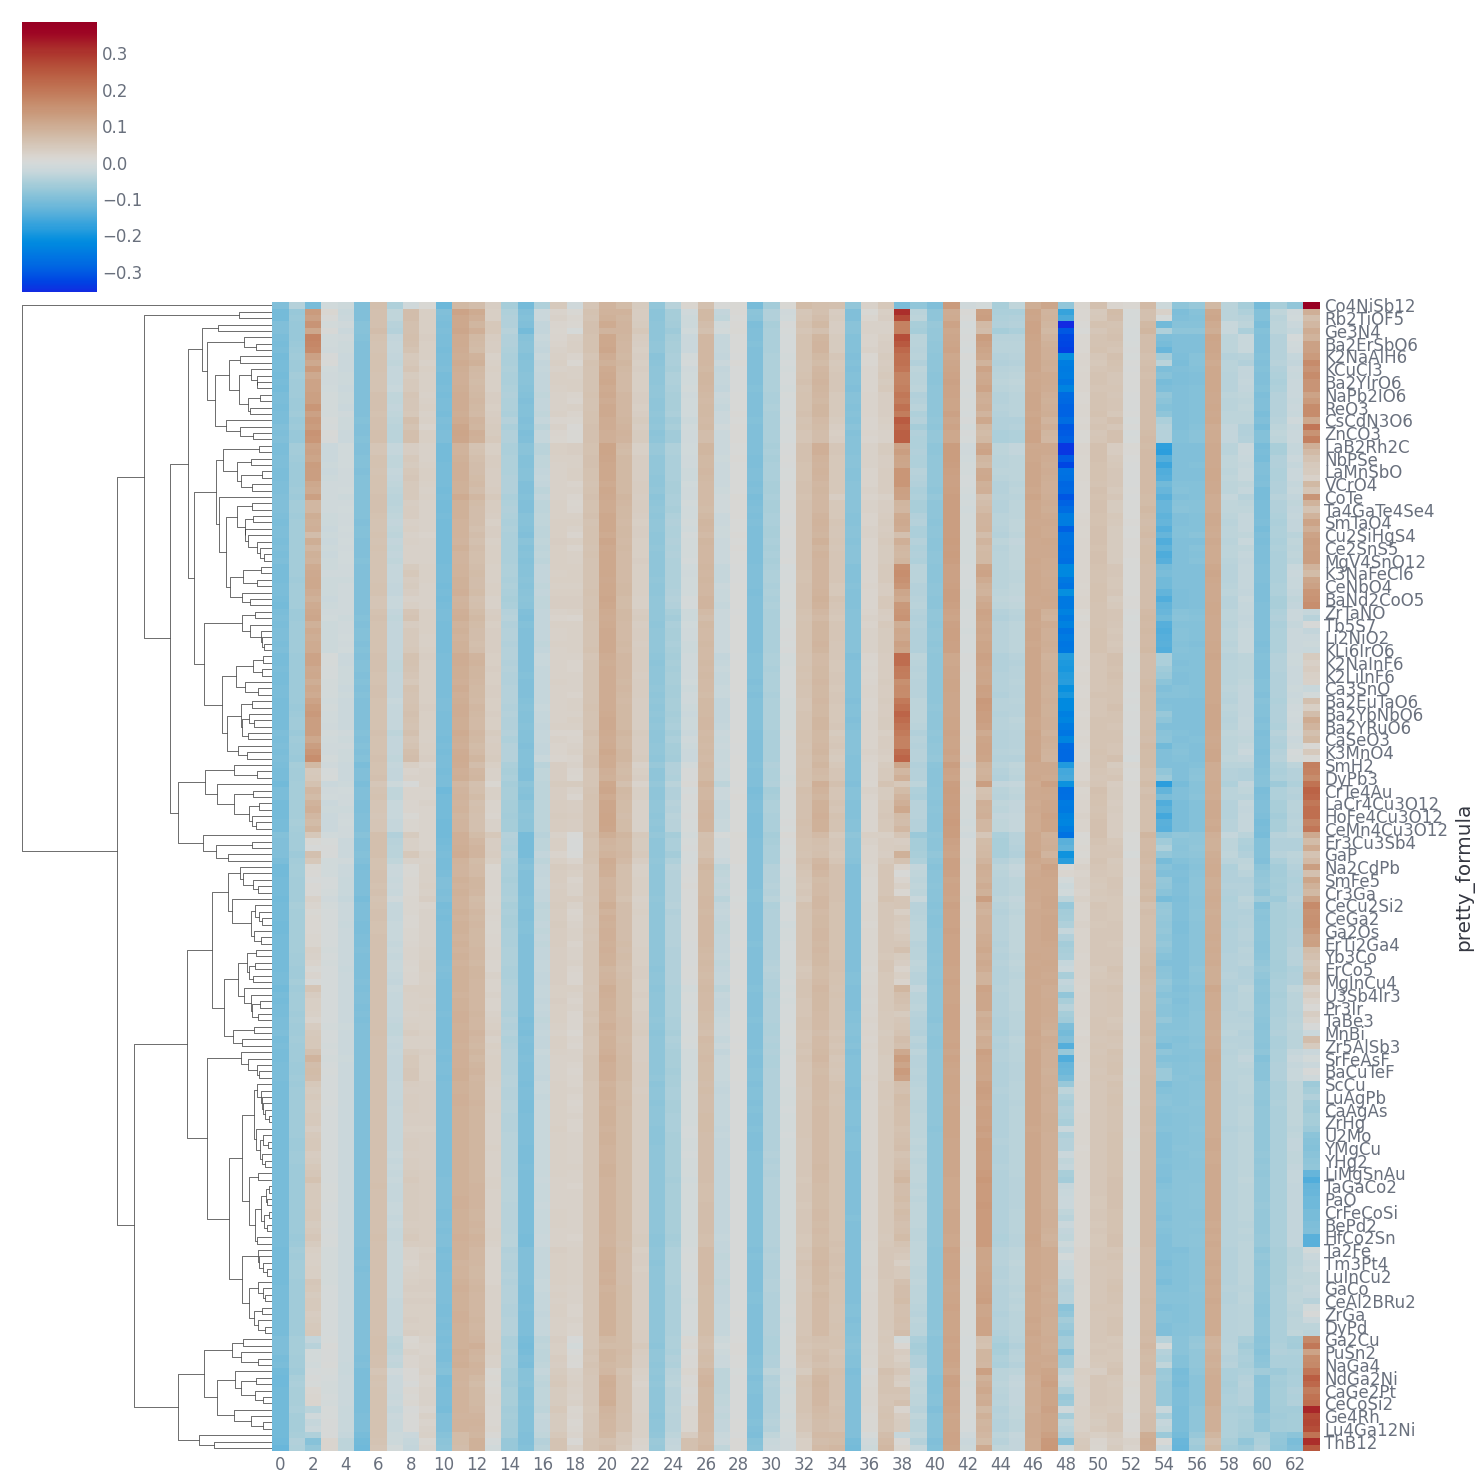

In [29]:
sns.clustermap(emb_df, cmap='rho_diverging', center=0, col_cluster=False, yticklabels=2, figsize=(15, 15))

In [42]:
from umap import UMAP

emb = UMAP(min_dist=2.0, spread=3)
umap_x, umap_y = emb.fit_transform(Z_np).T

c:\Users\nicho\miniforge3\lib\site-packages\umap\umap_.py:1401: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


In [47]:
benchmark['category'] = benchmark['category'].astype('category')

In [54]:
benchmark['category'].cat.categories

Index(['binary_easy', 'binary_hard', 'binary_medium', 'non-polymorph_binary',
       'non-polymorph_quartenary', 'non-polymorph_ternary', 'polymorph_binary',
       'polymorph_quartenary', 'polymorph_ternary', 'quartenary_hard',
       'quartenary_medium', 'quaternary_easy', 'template-based_binary',
       'template-based_quartenary', 'template-based_ternary', 'ternary_easy',
       'ternary_hard', 'ternary_medium'],
      dtype='object')

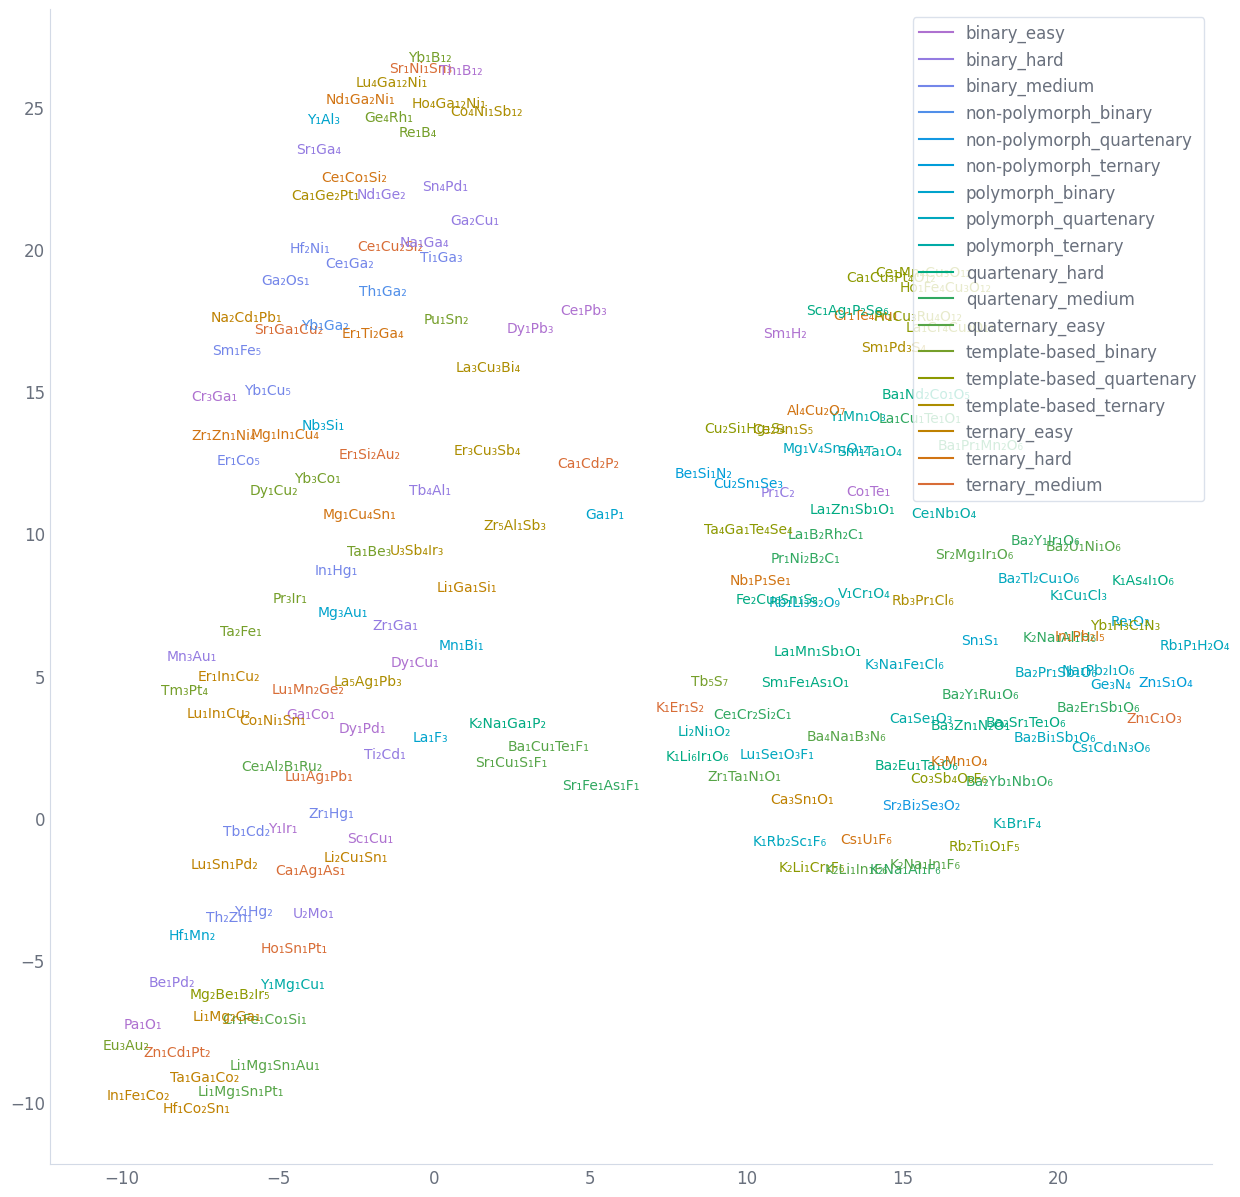

In [59]:
from pymatgen.core import Composition

fig, ax = plt.subplots(figsize=(15, 15))
colors = sns.color_palette('rho_iso_spectra', len(pd.unique(benchmark['category'])))
for color, cat in zip(colors, benchmark['category'].cat.categories):
    plt.plot(0, 0, c=color, label=cat)

for x, y, form, code in zip(umap_x, umap_y, benchmark['pretty_formula'], benchmark['category'].cat.codes.values):
    plt.text(x, y, Composition(form).to_unicode_string(), fontdict={'size': 10}, color=colors[code])
    plt.scatter(x, y, alpha=0)

plt.legend()